# Uranus

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from scipy import interpolate
from scipy.interpolate import interp1d
import seaborn as sns

### Lambert Scaling Function

In [21]:
# To convert to phase angle= 0 use the lambertian phase integral (PSG eqn 77) to simulate full disk view
def get_scale_factor_lambert(phase_angle): # phase angle in degrees
    scale_val= (1/np.pi)*(np.sin(np.deg2rad(phase_angle))+(np.pi-np.deg2rad(phase_angle))*np.cos(np.deg2rad(phase_angle)))
    return scale_val

### Read in all data sources

In [22]:
# karkoschka 1998 full disk albedo (updated values)
kark= np.genfromtxt('1995_karkoschka.txt')
# Roberge et al. 2017 SpeX Data
roberge= pd.read_csv('Roberge2017_geometricalbedo_allplanets.csv')
# Neff 1984
neff= pd.read_csv('Neff_SORTED_table4.csv')
# Courtin 1999 HST data
# courtin_b= pd.read_csv('uranus_12b_hst_fos_courtin.csv') - the 12 b data is actually from Karkoschka (not HST)
courtin_a= pd.read_csv('uranus_courtin_HST_12a.csv')
# Irwin et al. 2022
irwin_hst= pd.read_csv('uranus_hst_stis_irwin.csv')
irwin_irtf= pd.read_csv('uranus_irtf_irwin22.csv')
# Schmude et al 2015
schmude= np.genfromtxt('Schmude2015.txt')
# Wagener et al. 1986 geo. albedo
wagener= np.genfromtxt('wagener1986_table4.txt')
# lockwood 1983 - geo albedo
lockwood_1= np.genfromtxt('lockwood_1981_4A_table3.txt')
lockwood_2=np.genfromtxt('lockwood_1981_8A_table3.txt')

In [23]:
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [24]:
cb_palette= sns.color_palette("colorblind")

## The Tri Plot

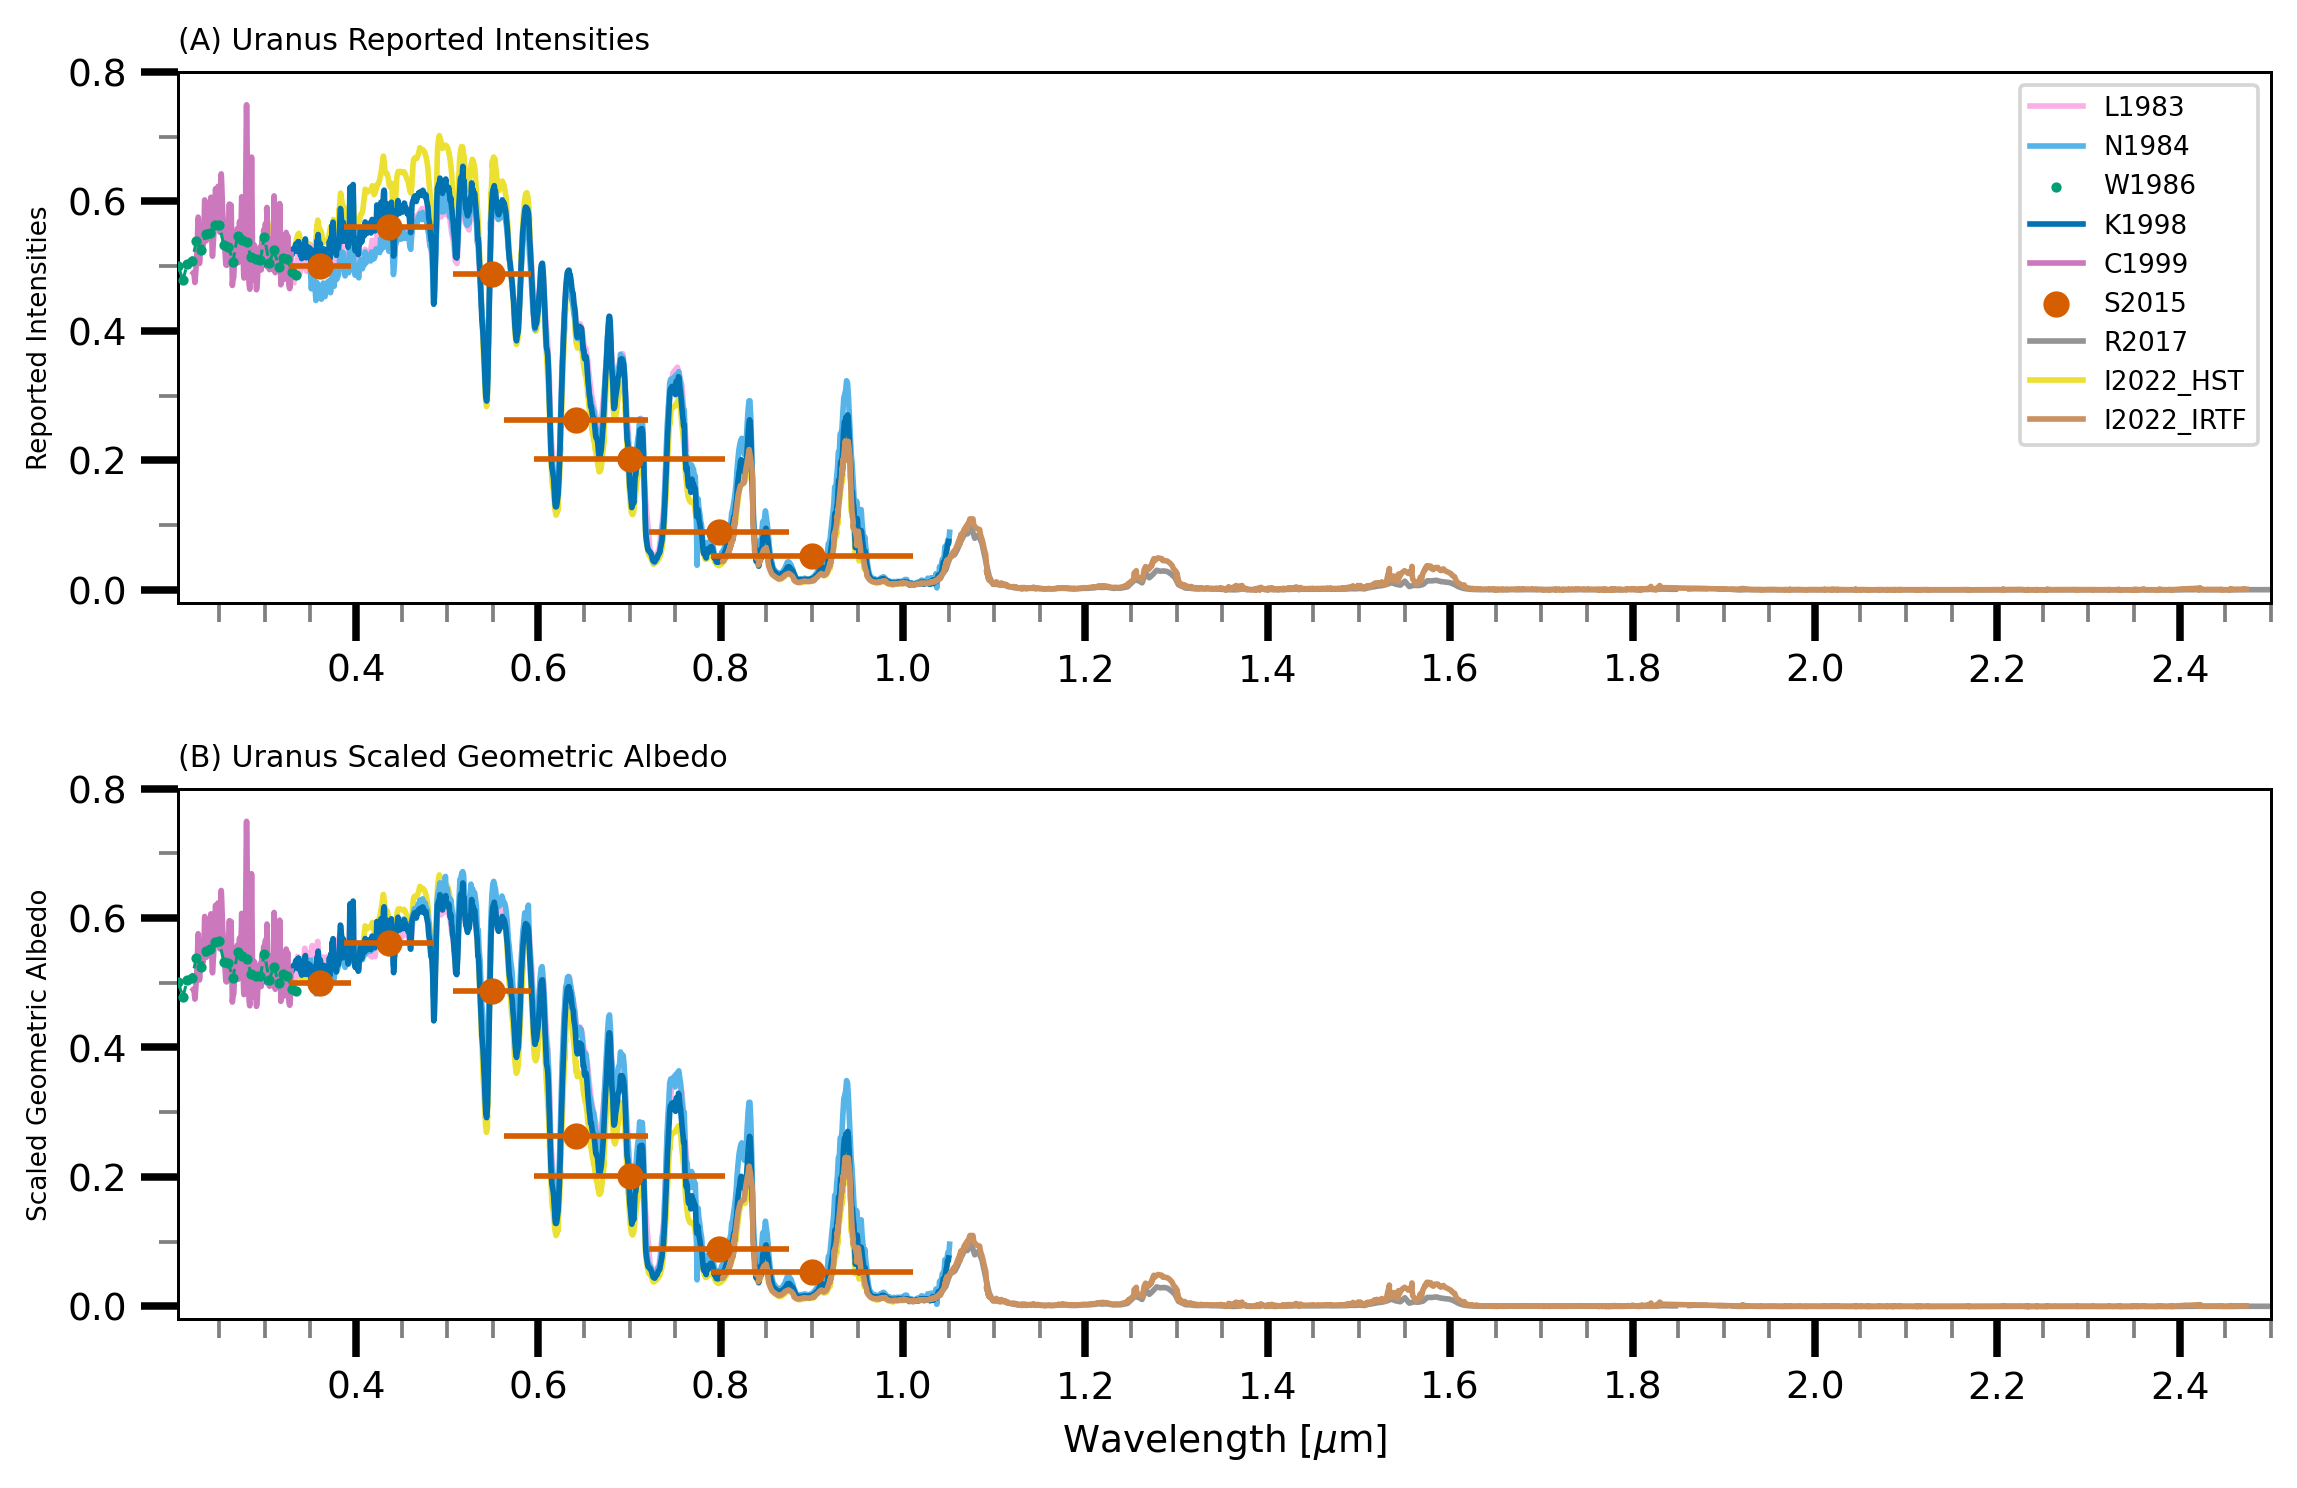

In [31]:
# Create figure and axes
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), dpi=270)
plt.subplots_adjust(hspace=0.35)

# DATA 
# FIGURE 1- ORIGINAL DATA
axes[0].plot(lockwood_1[:,0]/10000,lockwood_1[:,1], label='L1983', color=cb_palette[6])
axes[0].plot(lockwood_2[lockwood_2[:,0]/10000>0.545][:,0]/10000,lockwood_2[lockwood_2[:,0]/10000>0.545][:,1], color=cb_palette[6])
axes[0].plot(neff['wavelength']/10000,neff['p_uranus']/1000, color=cb_palette[9], label='N1984')
axes[0].scatter(wagener[:,0]/10000,wagener[:,1],label='W1986', zorder=3, s=3, color=cb_palette[2])
axes[0].plot(wagener[:,0]/10000,wagener[:,1], linestyle='--', linewidth=0.8, zorder=3,color=cb_palette[2])
axes[0].plot(kark[:,0]/1000,kark[:,5], label='K1998', color=cb_palette[0]) #0
axes[0].plot(courtin_a['x'],courtin_a['y'], label='C1999', color=cb_palette[4]) #2
axes[0].scatter(schmude[:,0], schmude[:,1], label='S2015', color=cb_palette[3], zorder=3)
axes[0].errorbar(schmude[:,0],schmude[:,1], xerr=schmude[:,2]/2, linestyle='none',color=cb_palette[3],zorder=3)
axes[0].plot(roberge[(roberge['Wavelength [$\\mu$m]']>=1) & (roberge['Wavelength [$\\mu$m]']<=1.79)]['Wavelength [$\\mu$m]'], roberge[(roberge['Wavelength [$\\mu$m]']>=1) & (roberge['Wavelength [$\\mu$m]']<=1.79)]['Uranus'], color=cb_palette[7], label='R2017')
axes[0].plot(roberge[(roberge['Wavelength [$\\mu$m]']>1.79) & (roberge['Wavelength [$\\mu$m]']<1.91)]['Wavelength [$\\mu$m]'], roberge[(roberge['Wavelength [$\\mu$m]']>1.79) & (roberge['Wavelength [$\\mu$m]']<1.91)]['Uranus'], color=cb_palette[7],linestyle='--')
axes[0].plot(roberge[(roberge['Wavelength [$\\mu$m]']>=1.91)]['Wavelength [$\\mu$m]'], roberge[roberge['Wavelength [$\\mu$m]']>=1.91]['Uranus'], color=cb_palette[7])
axes[0].plot(irwin_hst['x'],irwin_hst['y'], label='I2022_HST', color=cb_palette[8], zorder=1) #4
axes[0].plot(irwin_irtf['x'],irwin_irtf['y'], label='I2022_IRTF',color=cb_palette[5])

# # FIGURE 2- GEOMETRIC SCALING FACTORS APPLIED
axes[1].plot(lockwood_1[:,0]/10000,lockwood_1[:,1]*1.05, label='L1983', color=cb_palette[6])
axes[1].plot(lockwood_2[lockwood_2[:,0]/10000>0.545][:,0]/10000,lockwood_2[lockwood_2[:,0]/10000>0.545][:,1]*1.05, color=cb_palette[6])
axes[1].plot(neff['wavelength']/10000,neff['p_uranus']/1000*1.08, color=cb_palette[9], label='N1984')
axes[1].scatter(wagener[:,0]/10000,wagener[:,1],label='W1986', zorder=3, s=3, color=cb_palette[2])
axes[1].plot(wagener[:,0]/10000,wagener[:,1], linestyle='--', linewidth=0.8, zorder=3,color=cb_palette[2])
axes[1].plot(kark[:,0]/1000,kark[:,5], label='K1998', color=cb_palette[0]) #0
axes[1].plot(courtin_a['x'],courtin_a['y'], label='C1999', color=cb_palette[4]) #2
axes[1].scatter(schmude[:,0], schmude[:,1], label='S2015', color=cb_palette[3], zorder=3)
axes[1].errorbar(schmude[:,0],schmude[:,1], xerr=schmude[:,2]/2, linestyle='none',color=cb_palette[3],zorder=3)
axes[1].plot(roberge[(roberge['Wavelength [$\\mu$m]']>=1) & (roberge['Wavelength [$\\mu$m]']<=1.79)]['Wavelength [$\\mu$m]'], roberge[(roberge['Wavelength [$\\mu$m]']>=1) & (roberge['Wavelength [$\\mu$m]']<=1.79)]['Uranus'], color=cb_palette[7], label='R2017')
axes[1].plot(roberge[(roberge['Wavelength [$\\mu$m]']>1.79) & (roberge['Wavelength [$\\mu$m]']<1.91)]['Wavelength [$\\mu$m]'], roberge[(roberge['Wavelength [$\\mu$m]']>1.79) & (roberge['Wavelength [$\\mu$m]']<1.91)]['Uranus'], color=cb_palette[7],linestyle='--')
axes[1].plot(roberge[(roberge['Wavelength [$\\mu$m]']>=1.91)]['Wavelength [$\\mu$m]'], roberge[roberge['Wavelength [$\\mu$m]']>=1.91]['Uranus'], color=cb_palette[7])
axes[1].plot(irwin_hst['x'],irwin_hst['y']*0.95, label='I2022_HST', color=cb_palette[8], zorder=1) #4
axes[1].plot(irwin_irtf['x'],irwin_irtf['y'], label='I2022_IRTF',color=cb_palette[5])

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~FORMAT~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
for value in range(2):
    # Keeping the tick marks consistent across the plots
    axes[value].xaxis.set_major_locator(MultipleLocator(0.2))
    axes[value].xaxis.set_minor_locator(MultipleLocator(0.05))
    axes[value].yaxis.set_major_locator(MultipleLocator(0.2))
    axes[value].yaxis.set_minor_locator(MultipleLocator(0.1))
    # Customize the appearance of ticks
    axes[value].tick_params(axis='both', which='major', length=10, width=2, color='black')
    axes[value].tick_params(axis='both', which='minor', length=5, width=1, color='gray')
    #axes[value].set_xlim(0.2,max(meadows['x']))
    axes[value].set_ylim(-0.02,0.8)
    axes[value].set_xlim(min(wagener[:,0]/10000),2.5)
    
axes[0].set_title('(A) Uranus Reported Intensities', fontsize=8, loc='left')
#axes[1].set_title('(B) Uranus Geometric Scale Factors Applied', fontsize=8, loc='left')
axes[1].set_title('(B) Uranus Scaled Geometric Albedo', fontsize=8, loc='left')
axes[0].set_ylabel('Reported Intensities', fontsize=7)
#axes[1].set_ylabel('Intensities Scaled to Phase Zero Degrees', fontsize=7)
axes[1].set_ylabel('Scaled Geometric Albedo', fontsize=7)
axes[1].set_xlabel('Wavelength [$\mu$m]')
axes[0].legend(fontsize=7, loc='upper right') #, fancybox=True, shadow=True); #bbox_to_anchor=(0.7, 0.7),
#plt.legend(fontsize=5, loc='upper right')
plt.savefig('final_plots/Uranus_doubleplot.png', bbox_inches='tight');

## The Final Composite Spectrum
- for reference here

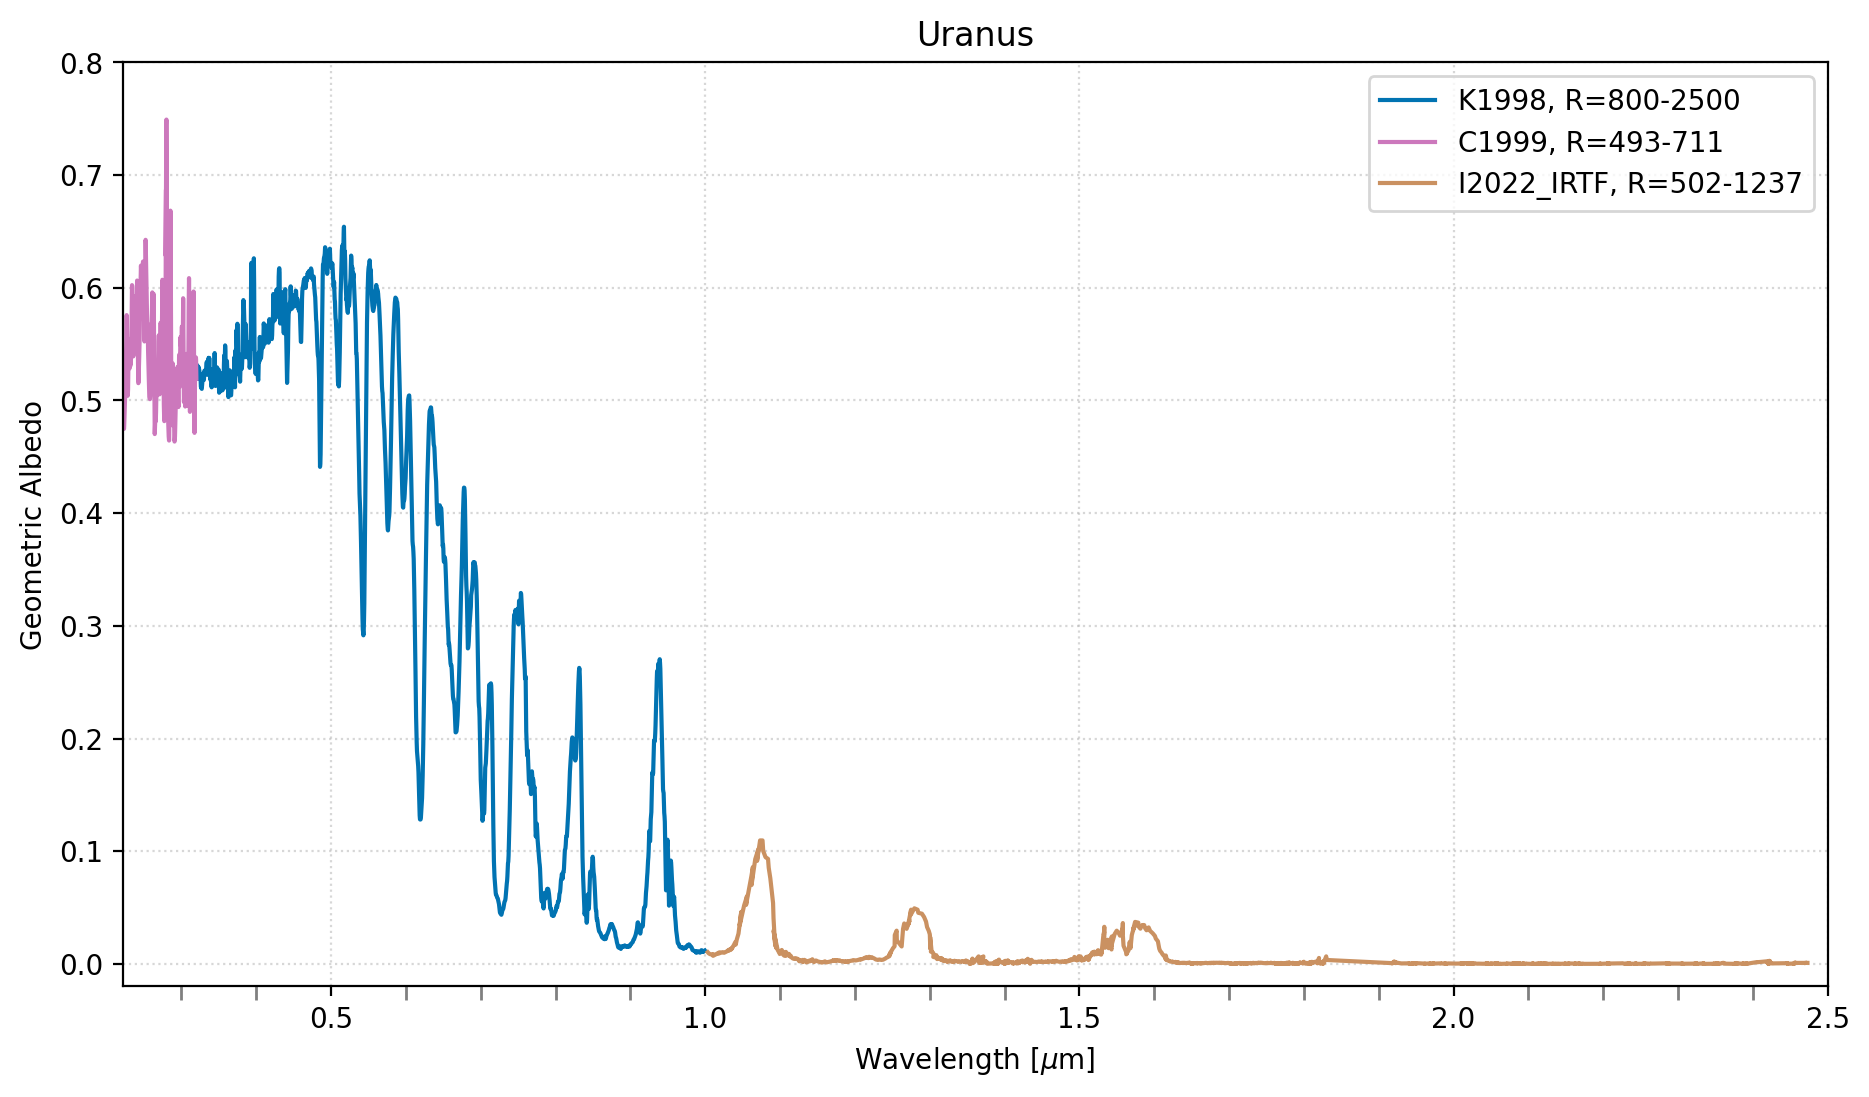

In [26]:
plt.figure(figsize=(11,6), dpi=200)

plt.plot(kark[(kark[:,0]/1000>0.32) & (kark[:,0]/1000<1)][:,0]/1000,kark[(kark[:,0]/1000>0.32) & (kark[:,0]/1000<1)][:,5], label='K1998, R=800-2500', color=cb_palette[0]) #0
plt.plot(courtin_a[courtin_a['x']<0.32]['x'],courtin_a[courtin_a['x']<0.32]['y'], label='C1999, R=493-711', color=cb_palette[4]) #2
plt.plot(irwin_irtf[irwin_irtf['x']>1]['x'],irwin_irtf[irwin_irtf['x']>1]['y'], label='I2022_IRTF, R=502-1237',color=cb_palette[5])

plt.gca().xaxis.set_minor_locator(MultipleLocator(0.1))
plt.gca().tick_params(axis='both', which='minor', length=5, width=1, color='gray')
plt.gca().yaxis.set_major_locator(MultipleLocator(0.1))
#plt.gca().yaxis.set_minor_locator(MultipleLocator(0.1))

plt.grid(linestyle='dotted', alpha=0.5)
plt.legend()
plt.ylim(-0.02,0.8)
plt.xlim(min(courtin_a['x']),2.5)
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Geometric Albedo')
plt.title('Uranus')
plt.savefig('final_plots/uranus_composite.png', bbox_inches="tight");

## Save everything into one csv file:

In [27]:
x_1= list(courtin_a[courtin_a['x']<0.32]['x'])
y_1= list(courtin_a[courtin_a['x']<0.32]['y'])
x_2= kark[(kark[:,0]/1000>0.32) & (kark[:,0]/1000<1)][:,0]/1000
y_2= kark[(kark[:,0]/1000>0.32) & (kark[:,0]/1000<1)][:,5]
x_3= irwin_irtf[irwin_irtf['x']>1]['x']
y_3= irwin_irtf[irwin_irtf['x']>1]['y']
x_new_list= np.concatenate((x_1, x_2, x_3))
y_new_list= np.concatenate((y_1, y_2, y_3))
composite_df= pd.DataFrame({'x_1': x_new_list, 'y_1': y_new_list})

composite_df.to_csv('composite_spectrum/uranus_composite_data.csv', index=False)
composite_df.to_csv('composite_spectrum/uranus_composite_data.txt', sep=' ', index=False)